<h1><center>
    ECE 438 - Laboratory 7<br/>
    Discrete-Time Random Process (Week 2)<br/>
    <small>Last updated on March 22, 2022</small><br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of correlation coefficient for 2 random variables (30 pts)**: *Derivation, numerical estimates, scatter plots, questions*||||
|**Understanding of autocorrelation for filtered random processes (35 pts)**: *Derivation, scatter plots, autocorrelation plots, Python code, questions*||||
|**Understanding of correlation of two random processes (35 pts)**: *Cross-correlation plot, Python code, signal plots, auto and cross correlation plots of signals, questions*||||

In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 1.2: Samples of Two Random Variables</left></h3>

**1. Use equation (8) to analytically calculate the correlation coefficient $\rho_{XZ}$ between $X$ and $Z$. Show all of your work. Remember that independence between $X$ and $Y$ implies that $\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$. Also remember that $X$ and $Y$ are zero-mean and unit variance.**

insert your answer here

**2. Write code to generate $1000$ i.i.d. samples of $X$, denoted as $X_1,X_2,\dots,X_{1000}$, and $1000$ i.i.d. samples of $Y$, denoted as $Y_1,Y_2,\dots,Y_{1000}$.**

In [145]:
# insert your code here
x = np.random.normal(loc=0.0, scale=1.0, size=1000)
y = np.random.normal(loc=0.0, scale=1.0, size=1000)


**3. Create samples of $Z$ using your generated samples of $X$ and $Z$. Since there are 4 different $Z$'s, we name the variables as ```Z1```, ```Z2```, ```Z3```, ```Z4```.**

In [146]:
# insert your code here
z1 = y
z2 = (x + y) / 2
z3 = (4*x + y) / 2
z4 = (99*x + y) / 100


**4. Generate a scatter plot of the ordered pair of samples $(X_i,Z_i)$ for each of 4 $Z$'s. Do this by plotting points $(X_1,Z_1),(X_2,Z_2),\dots,(X_{1000},Z_{1000})$. In order to plot points without connecting them with lines, use the ```plt.plot(X, Z, '.')``` command.**

(a) $Z=Y$

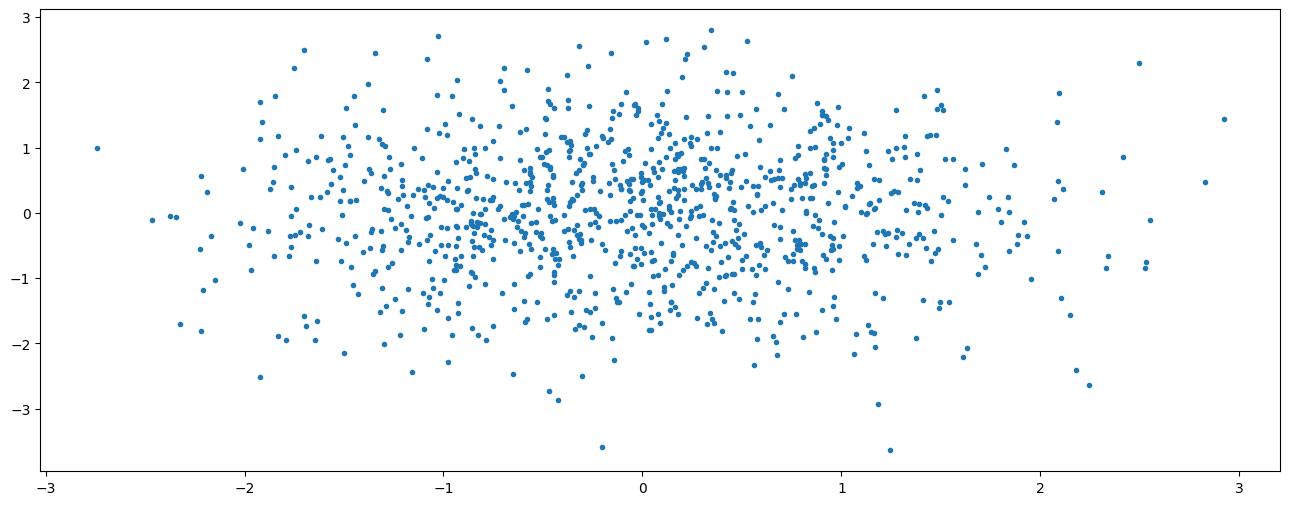

In [147]:
# insert your code here
plt.plot(x, z1, '.')


(b) $Z=\frac{X+Y}{2}$

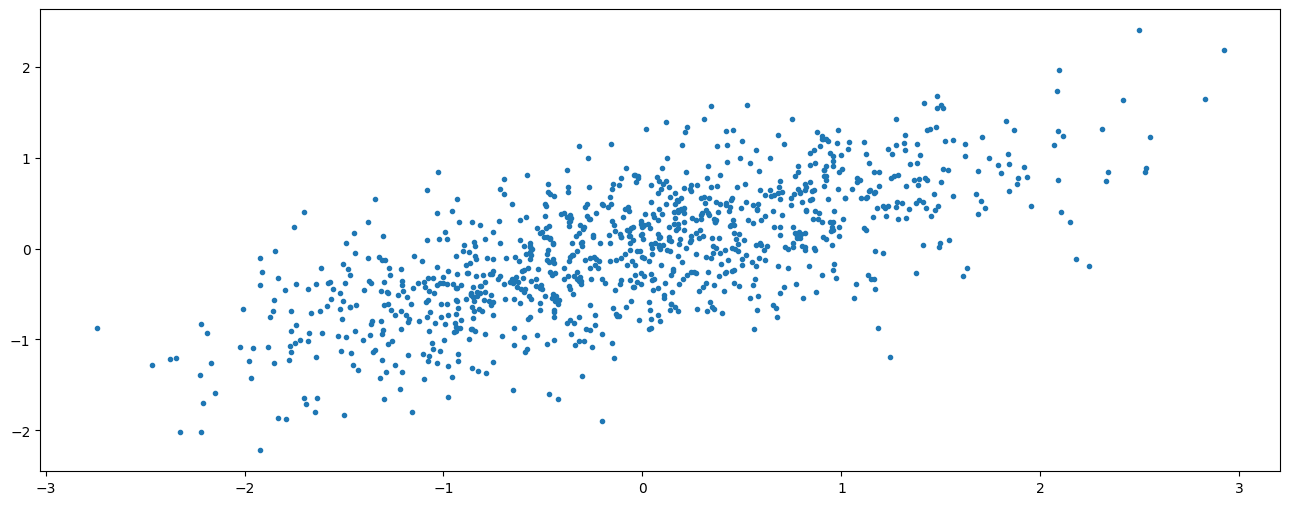

In [148]:
# insert your code here
plt.plot(x, z2, '.')


(c) $Z=\frac{4X+Y}{5}$

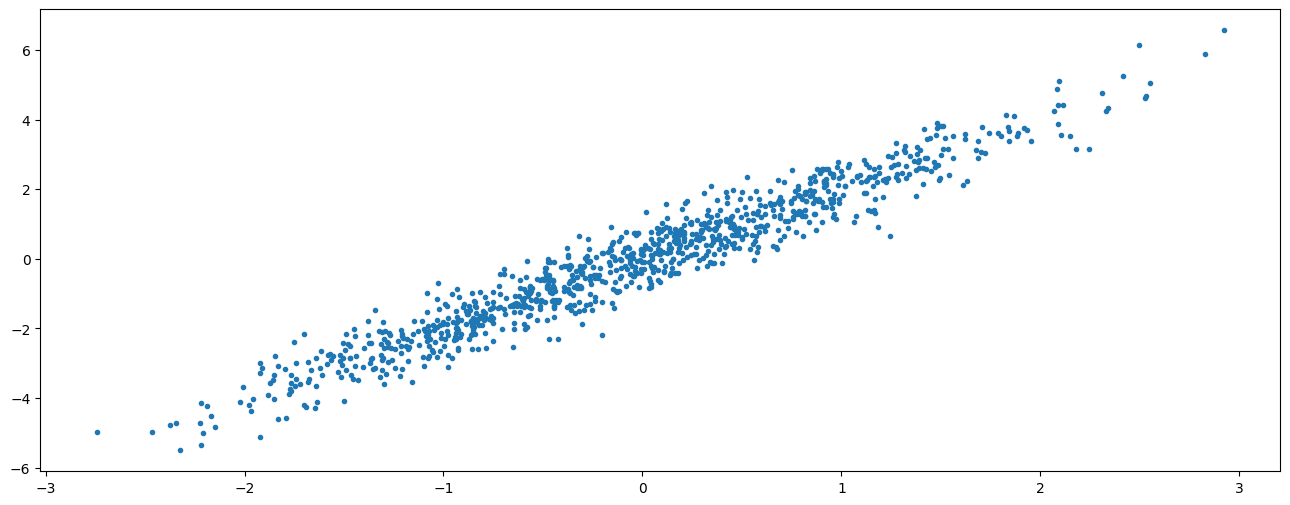

In [149]:
# insert your code here
plt.plot(x, z3, '.')

(d) $Z=\frac{99X+Y}{100}$

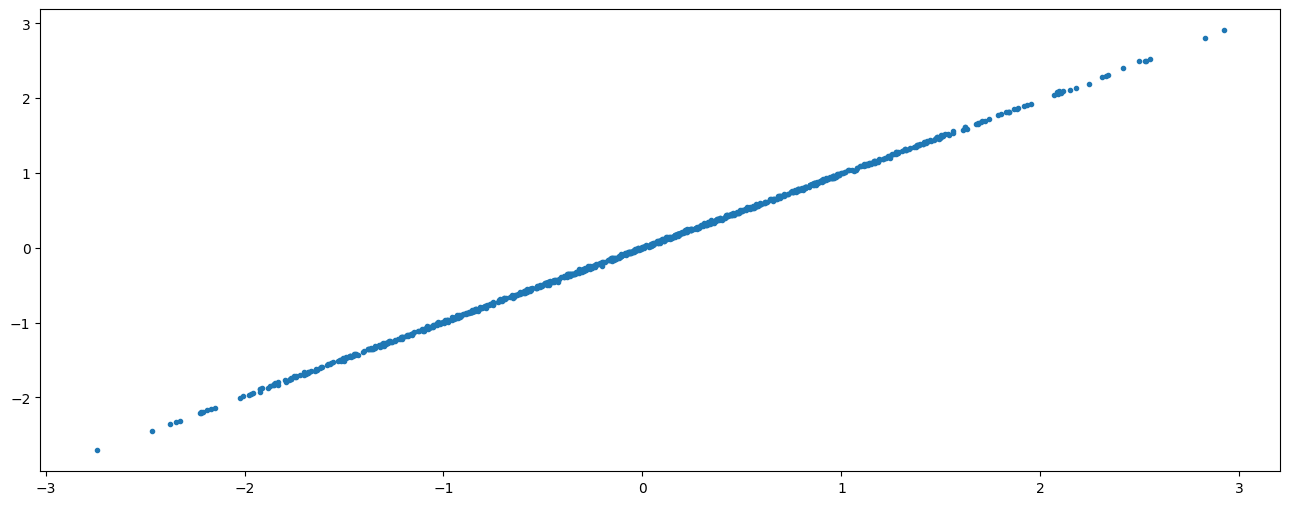

In [150]:
# insert your code here
plt.plot(x, z4, '.')

**5. Complete the function below that empirically computes an estimate of the correlation coefficient using your samples $X_i$ and $Z_i$ and the following formula.**

\begin{equation}
    \hat{\rho}_{XZ}=\frac{\sum_{i=1}^N(X_i-\hat{\mu}_X)(Z_i-\hat{\mu}_Z)}{\sqrt{\sum_{i=1}^N(X_i-\hat{\mu}_X)^2\sum_{i=1}^N(Z_i-\hat{\mu}_Z)^2}}
\end{equation}

**Hint:** You will need to make use of the function ```get_sample_mean(X)``` that you wrote in Lab07a.

In [151]:
def get_sample_mean(X):
    """
    Parameters
    ---
    X: the samples of the random variable
    
    Returns
    ---
    mean_X: the sample mean of the random variable
    """

    N = len(X)
    mean_X = (1/N) * np.sum(X)

    return mean_X

In [152]:
def empirical_corr_coef(X, Z):
    """
    Parameters
    ---
    X: random samples
    Z: random samples
    Returns
    ---
    rho: the correlation coefficient
    """
    num = np.sum( (X - get_sample_mean(X)) * (Z - get_sample_mean(Z)) )
    denom = np.sqrt( np.sum( (X - get_sample_mean(X))**2 ) * np.sum( (Z - get_sample_mean(Z))**2 ) )
    rho = num/denom
    return rho

**6. Print the empirical correlation coefficient between $X$ and $Z$ for each of the four cases.**

(a) $Z=Y$

In [153]:
# insert your code here
print(empirical_corr_coef(x, z1))

0.002924514769588232


(b) $Z=\frac{X+Y}{2}$

In [154]:
# insert your code here
print(empirical_corr_coef(x, z2))

0.6919075709688579


(c) $Z=\frac{4X+Y}{5}$

In [155]:
# insert your code here
print(empirical_corr_coef(x, z3))

0.9674760872964354


(d) $Z=\frac{99X+Y}{100}$

In [156]:
# insert your code here
print(empirical_corr_coef(x, z4))

0.999944120495925


**7. Why are $\rho_{XZ}$ and $\hat{\rho}_{XZ}$ not exactly equal?**

insert your answer here

**8. Explain how the scatter plots are related to $\rho_{XZ}$.**

insert your answer here

<h3 style="color:red;"><left>Exercise 2.2</left></h3>

**1. Calculate the theoretical autocorrelation of $Y_n$, $r_{YY}[m]$, using (10) and (11). Show all of your work.**

insert your answer here

**2. Write code to generate $1000$ independent samples of a Gaussian random variable $X$ with mean $0$ and variance $1$. Filter the samples using (12). We will denote the filtered signal $Y_i$, $i=1,2,\dots,1000$.**

In [157]:
# insert your code here
x = np.random.normal(loc=0.0, scale=1.0, size=1000)

y = np.zeros(1000)
y[0] = x[0]
y[1] = x[1] - x[0]

for i in range(2, 1000):
  y[i] = x[i] - x[i - 1] + x[i - 2]

**3. Plot the following 4 scatter plots. Include the corresponding theoretical correlation, using $r_{YY}[m]$, in the title.**

(a) $(Y_i,Y_{i+1})$ for $i=1,2,\dots,990$

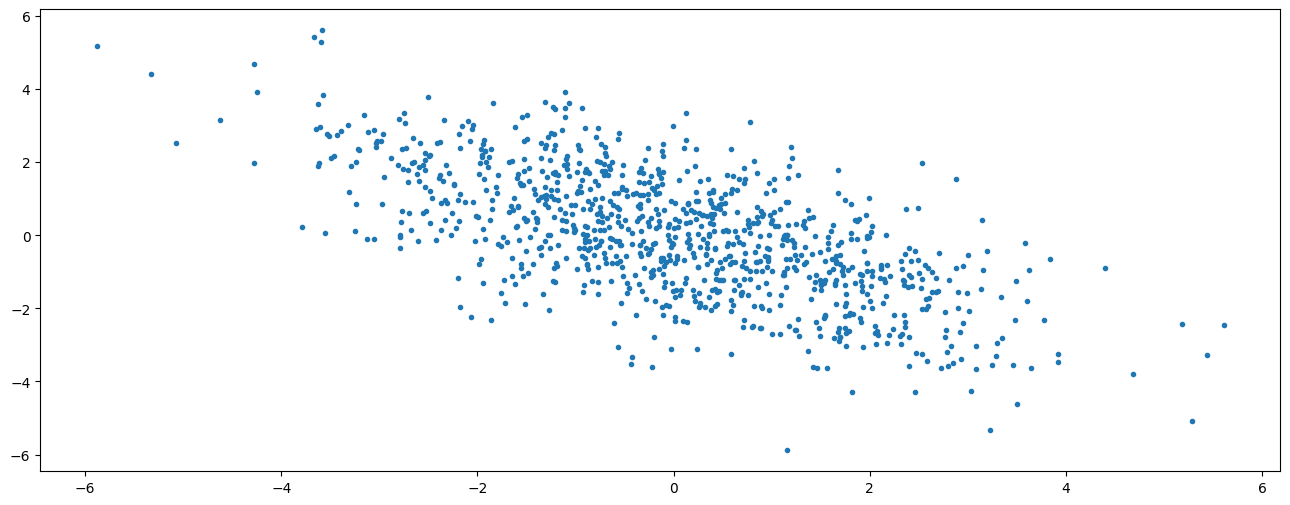

In [158]:
# insert your code here
plt.plot(y[1:991], y[2:992], '.')

(b) $(Y_i,Y_{i+2})$ for $i=1,2,\dots,990$

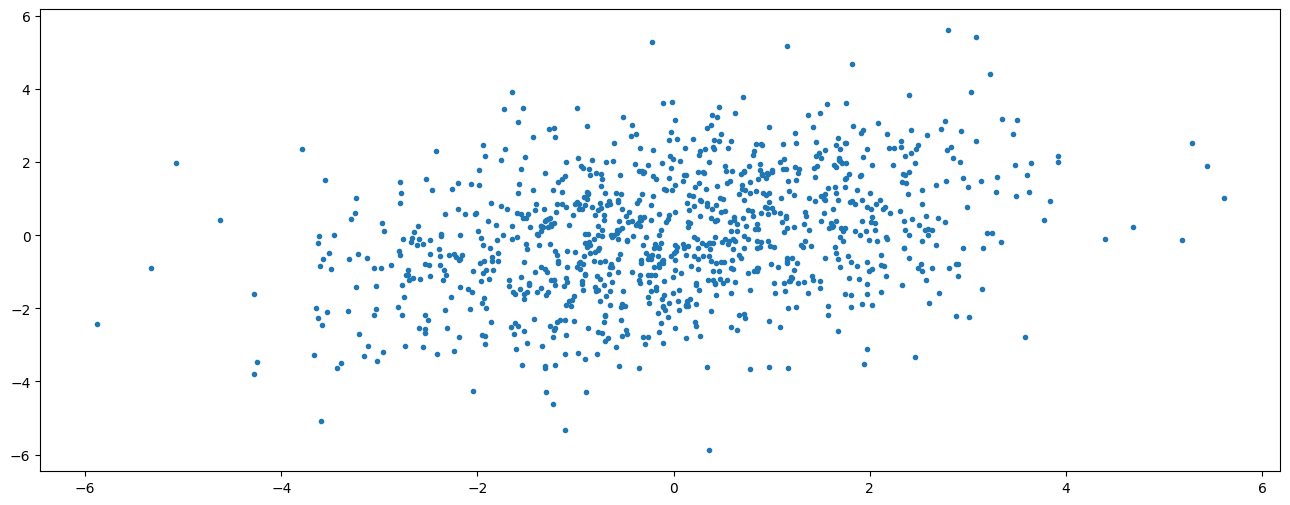

In [159]:
# insert your code here
plt.plot(y[1:991], y[3:993], '.')

(c) $(Y_i,Y_{i+3})$ for $i=1,2,\dots,990$

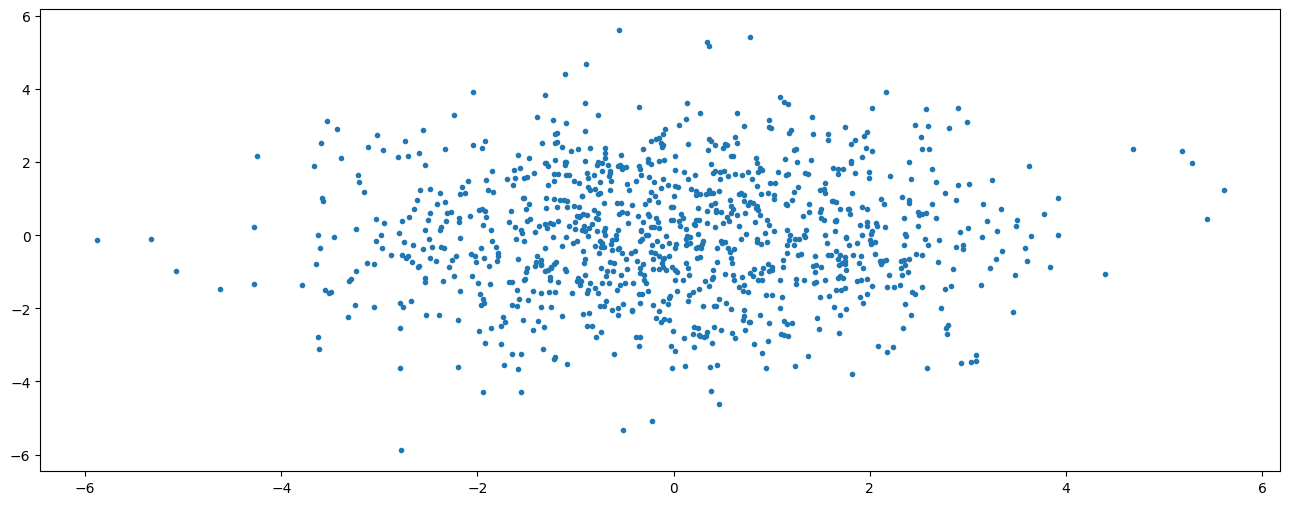

In [160]:
# insert your code here
plt.plot(y[1:991], y[4:994], '.')

(d) $(Y_i,Y_{i+4})$ for $i=1,2,\dots,990$

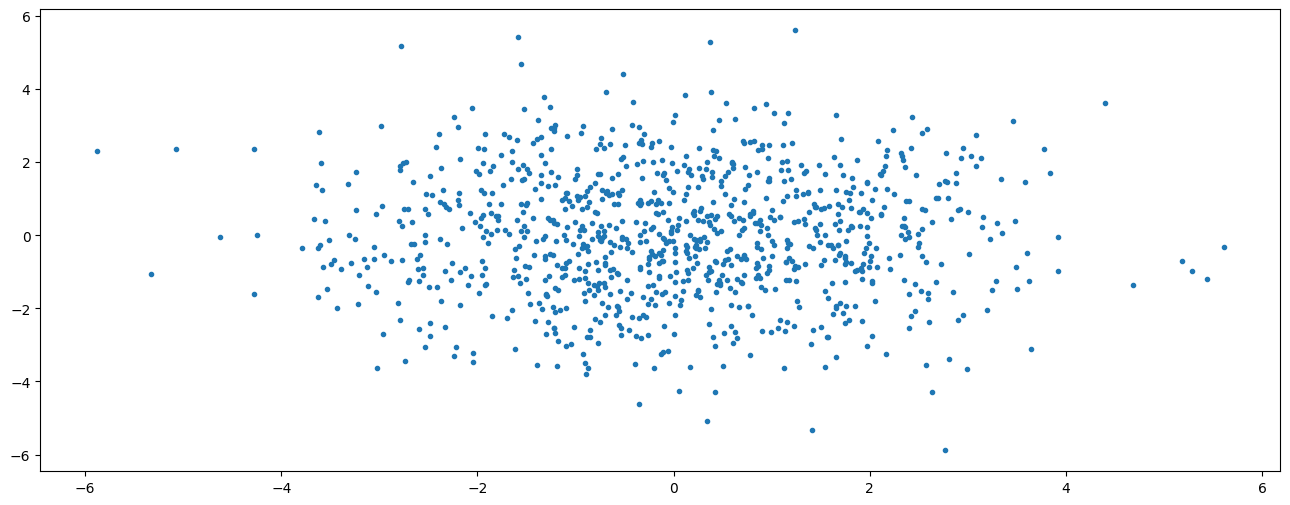

In [161]:
# insert your code here
plt.plot(y[1:991], y[5:995], '.')

**4. What can you conclude about the output random process from these plots?**

insert your answer here

**5. Complete the function below to calculate the sample autocorrelation of $Y_n$ using (13).**

In [168]:
def get_sample_autocorr(X, m):
    """
    Parameters
    ---
    X: the random process
    m: the vector of lag values
    
    Returns
    ---
    r: the sample autocorrelation
    X[n + abs(m)]
    """
    N = len(X)
    r = np.zeros(len(m))

    for i, j in enumerate(m): # first value index, second value data
      r[i] = 1 / (N - np.abs(j)) * np.sum(X[:N - np.abs(j)] * X[np.abs(j):N]) 
    return r

**6. Make the following two plots.**

(a) $r_{YY}$ vs $m$ for $-20\leq m\leq20$

In [163]:
def get_sample_var(X):
    """
    Parameters
    ---
    X: the samples of the random variable
    
    Returns:
    ---
    var_X: the sample variance of the random variable
    """
    N = len(X)
    var_X = 1/(N-1) * np.sum((X - get_sample_mean(X)) ** 2)
    return var_X

<StemContainer object of 3 artists>

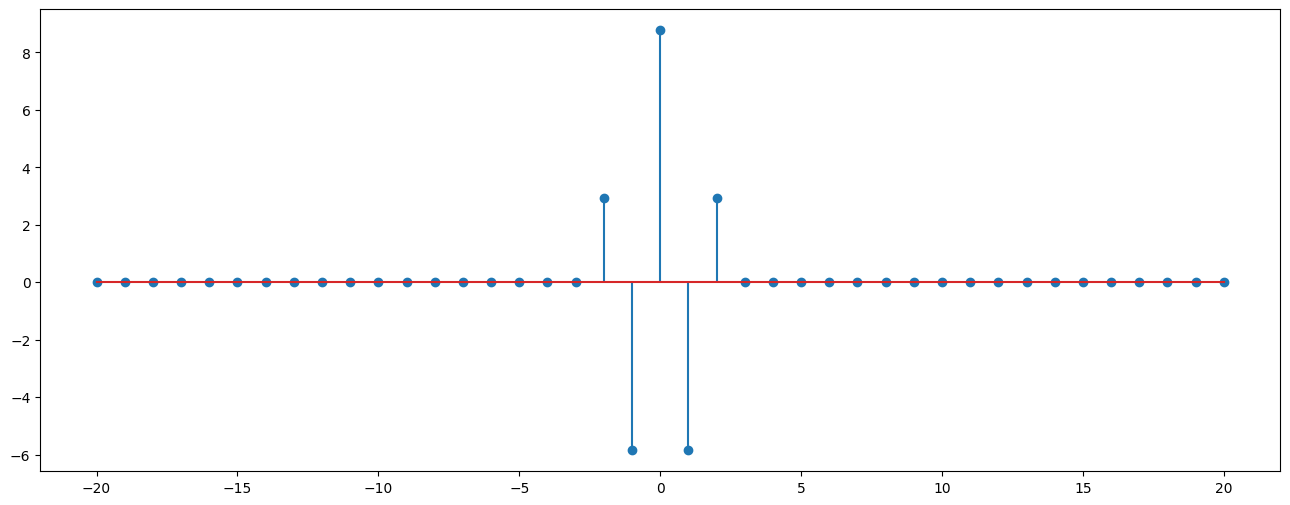

In [164]:
# insert your code here
m = np.linspace(-20, 20, 41)
rxx = get_sample_var(y) * (m == 0).astype(float)

hn = np.zeros(41)
hn[0] = 1
hn[1] = -1
hn[2] = 1

ryy = np.convolve(np.convolve(hn, np.flip(hn)), rxx)

plt.stem(m, ryy[40:81])



(b) $r'_{YY}$ vs $m$ for $-20\leq m\leq20$

<StemContainer object of 3 artists>

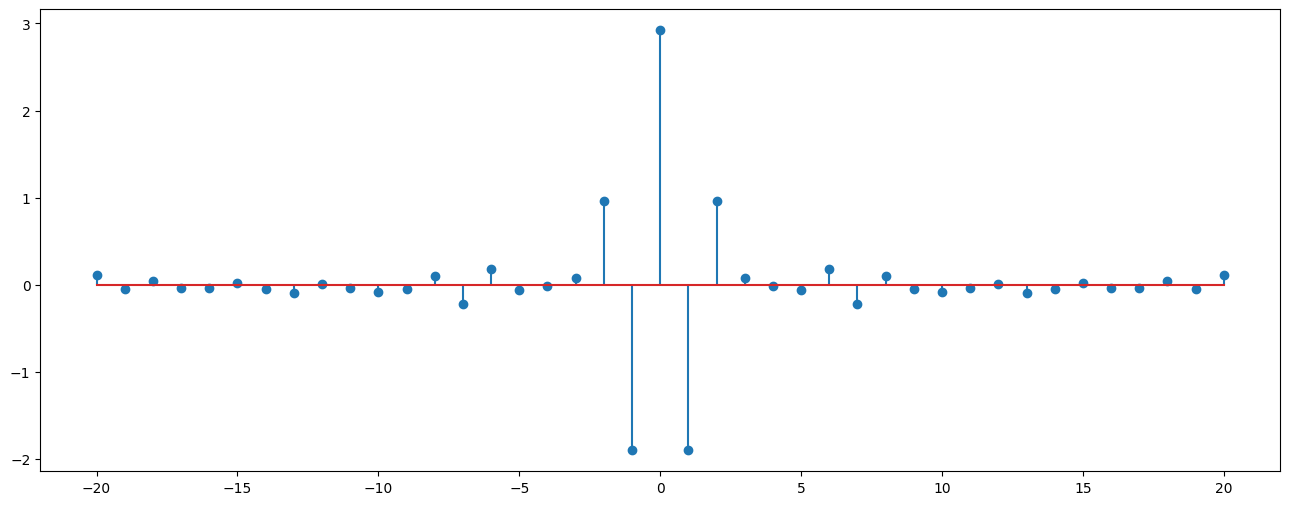

In [173]:
# insert your code here
m = np.linspace(-20, 20, 41).astype(int)
plt.stem(m, get_sample_autocorr(y, m))


**7. Does equation (13) produce a reasonable approximation of the true autocorrelation?**

insert your answer here

**8. For what value of $m$ does $r_{YY}[m]$ reach its maximum?**

insert your answer here

**9. For what value of $m$ does $r'_{YY}[m]$ reach its maximum?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.2</left></h3>

**1. Using (15) and (16), complete the function below to compute the sample cross-correlation between two discrete-time random processes, $X$ and $Y$.**

In [ ]:
def get_sample_crosscorr(X, Y, ms):
    """
    Parameters
    ---
    X: the first random process
    Y: the second random process
    ms: the vector of the lag values
    
    Returns
    ---
    c: the sample cross-correlation
    """
    
    c = None
    return c

**2. Generate two length $1000$ sequences of zero-mean Gaussian random variables, denoted as $X_n$ and $Z_n$. Then generate a new sequence $Y_n=X_n+Z_n$.**

In [ ]:
# insert your code here


**3. Use the function ```get_sample_crosscorr(X, Y, ms)``` to calculate the sample cross-correlation between $X$ and $Y$ for lags $-10\leq m\leq10$. Plot the cross-correlation function.**

In [ ]:
# insert your code here


**4. Which value of $m$ produces the largest cross-correlation? Why?**

insert your answer here

**5. Is the cross-correlation function an even function of $m$? Why or why not?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.3</left></h3>

In [ ]:
trans = np.load("trans.npy")
received = np.load("received.npy")
print(f"Length of trans: {len(trans)}")
print(f"Length of received: {len(received)}")

# convert them to numpy arrays
trans, received = np.array(trans), np.array(received)

**1. Plot the transmitted signal and the received signal.**

In [ ]:
# insert your code here


**2. Can you estimate the delay $D$ by a visual inspection of the received signal?**

insert your answer here

**3. Compute the autocorrelation of the signal ```trans``` for the lags $-100\leq m\leq 100$, and plot it.**

In [ ]:
# insert your code here


**4. Compute the sample cross-correlation between the signal ```trans``` and ```received``` for the range of lag values $-100\leq m\leq100$.**

In [ ]:
# insert your code here


**5. Determine the delay $D$ from the sample correlation. How did you determine this?**

In [ ]:
# insert your code here
